# Logistic Regression

## Zaidan Mufaddhal | AIU20092029

### 1. Data Pre-processing step

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Downloads/diabetes.csv')

In [10]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Extract the Dependent and Independent Variables

In [85]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [86]:
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [56]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

### Splitting the dataset into the Training set and Test set

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

### Feature Scaling

In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [68]:
x_train

array([[ 1.50755225, -1.01521454, -0.40451932, ..., -1.22070104,
        -0.98325882, -0.04863985],
       [-0.82986389, -0.09964691, -0.61509602, ...,  0.13719053,
        -0.62493647, -0.88246592],
       [-1.12204091, -0.95207195,  0.54307587, ...,  0.0240329 ,
         0.39884168, -0.5489355 ],
       ...,
       [ 0.04666716, -0.85735805, -0.24658679, ..., -0.9440935 ,
        -0.96519215, -1.04923114],
       [ 2.09190629, -1.14149973,  0.2272108 , ..., -0.26514771,
        -0.5075031 ,  0.11812536],
       [ 0.33884418,  0.46863645,  0.64836422, ..., -4.04964181,
         0.51627505,  2.953134  ]])

In [69]:
x_test

array([[-0.82986389,  2.4576282 ,  0.33249916, ...,  1.34420526,
         2.78665365, -0.96584853],
       [-0.53768687, -0.44693118,  0.2272108 , ...,  0.17490974,
        -0.19434743, -0.88246592],
       [ 0.04666716, -1.42564141, -0.40451932, ...,  0.22520202,
        -0.23349189, -0.71570071],
       ...,
       [-0.82986389, -0.38378859, -0.50980767, ..., -0.85608201,
         1.4406865 , -1.04923114],
       [-0.24550986,  0.21606607,  0.43778751, ..., -1.39672402,
        -0.60385869,  1.7857775 ],
       [ 0.33884418, -1.04678584,  0.43778751, ..., -0.57947447,
        -0.63396981,  0.28489057]])

### 2. Fitting Logistic Regression to the Training set

In [70]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

### 3. Predicting the Test Result

In [71]:
y_pred= classifier.predict(x_test) 

In [72]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [73]:
y_test

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

### 4. Test Accuracy of the result

In [74]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[118  12]
 [ 26  36]]


In [75]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8020833333333334


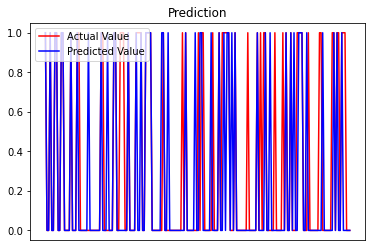

In [76]:
fig, ax = plt.subplots()
#visualizing the Test set results  
#plt.plot(y_test, y_pred, color="blue")   
plt.plot(y_test, color="red", label="Actual Value")
plt.plot(y_pred, color="blue", label="Predicted Value") 
ax.legend(loc=2); # upper left corner
ax.set_xticks([])
#ax.set_yticks([])
plt.title("Prediction")  
plt.show() 

By interpreting the matrix confusion, we can conclude that there are 118+36=154 correct output and 26+12=36 incorrect output

### 5. Result visualization

### Visualizing the training set result

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


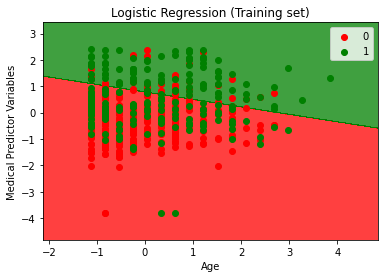

In [81]:
#Visualizing the training set result  
#ListedColormap class help us to colorize the data points.
from matplotlib.colors import ListedColormap

#Create local variables X_set and y_set. Because we use these #variables again in the test set
x_set, y_set = x_train, y_train

#Create the grid. step=0.01 means all the pixels were actually with #a 0.01 resolution. min and max of the 
#X_Set use with minus ana plus one to prevent ponits to be squeezed #on the axes.
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))

#This is the line applying the classifier on all the pixel #observation points. It colors all the red pixel 
#points and the blue pixel points. contour function make the contour #between red and blue regions.
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()] + [np.repeat(0, x1.ravel().size) for _ in range(6)]).T).reshape(x1.shape),  
    alpha = 0.75, cmap = ListedColormap(('red', 'green')))

#plot the limits of the age and the estimated salary lines.
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

#This loop here plots all the data points that are the real values.
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

#Add the name of the plot and the labels.    
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Medical Predictor Variables')
plt.legend()
plt.show()

### Visualizing the test set result

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


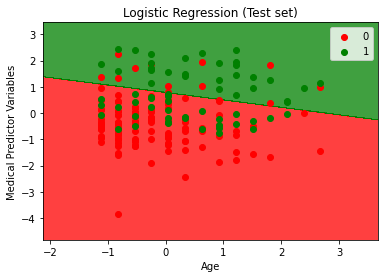

In [84]:
#Visualizing the test set result  
#ListedColormap class help us to colorize the data points.
from matplotlib.colors import ListedColormap

#Create local variables x_set and y_set. Because we use these #variables again in the test set
x_set, y_set = x_test, y_test

#Create the grid. step=0.01 means all the pixels were actually with #a 0.01 resolution. min and max of the 
#X_Set use with minus ana plus one to prevent ponits to be squeezed #on the axes.
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))

#This is the line applying the classifier on all the pixel #observation points. It colors all the red pixel 
#points and the blue pixel points. contour function make the contour #between red and blue regions.
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()] + [np.repeat(0, x1.ravel().size) for _ in range(6)]).T).reshape(x1.shape),  
    alpha = 0.75, cmap = ListedColormap(('red', 'green')))

#plot the limits of the age and the estimated salary lines.
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

#This loop here plots all the data points that are the real values.
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

#Add the name of the plot and the labels.    
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Medical Predictor Variables')
plt.legend()
plt.show()